In [1]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import pickle
plt.rcParams["font.family"] = "Times"
#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
CONTOUR_NUM = 20
TICK_SIZE = 15
LABEL_SIZE = 15
TITLE_SIZE = 20

PAD = 0

In [3]:
def plot_Z_single(DATASET, METHOD, ratio_id, CONTOUR_MIN, CONTOUR_MAX):

    with open(f"../experiments/sparse-contour-plots/experiment_results/{DATASET}_Z_{ratio_id}_fold_3.pkl", "rb") as f:
        result = pickle.load(f)

    if METHOD == 'cvi':
        lml = result['mean_lml']
    else:
        lml = result['mean_lml_ep']

    lml_masked = np.ma.array(lml,mask=np.isnan(lml))

    SIGMA_GRID_MIN, SIGMA_GRID_MAX, L_GRID_MIN, L_GRID_MAX, GRID_NUM = result["grid_min_max_num"]

    log_l = np.linspace(L_GRID_MIN, L_GRID_MAX, GRID_NUM)
    log_sigma = np.linspace(SIGMA_GRID_MIN, SIGMA_GRID_MAX, GRID_NUM)
    [plot_x, plot_y] = np.meshgrid(log_l, log_sigma)

    levels = np.linspace(CONTOUR_MIN, CONTOUR_MAX, CONTOUR_NUM)

    # Get the colormap and set the under and bad colors
    colMap = cm.Blues.reversed()
    colMap.set_over(color='gray')
    colMap.set_under(color='black')

    plt.gca().set_facecolor("pink")
    plt.contourf(plot_x, plot_y, np.flip(lml_masked, axis=0), cmap = colMap, levels=levels, extend='min')
    #plt.imshow(lml, cmap = colMap, vmin = CONTOUR_MIN, vmax = CONTOUR_MAX)

    ax = plt.gca()

    ax.tick_params(axis="y",direction="in", pad=-PAD)
    ax.tick_params(axis="x",direction="in", pad=-PAD)



In [4]:
def plot_result(DATASET, CONTOUR_MIN, CONTOUR_MAX):
    
    
    ratio= ['10%', '25%', '50%', '75%']
    
    with open(f"../experiments/contour-plots/experiment_results/{DATASET}_mcmc_fold_3.pkl", "rb") as f:
        mcmc = pickle.load(f)['mean_lml']
        
    with open(f"../experiments/contour-plots/experiment_results/{DATASET}_cvi_fold_3.pkl", "rb") as f:
        full = pickle.load(f)
        full_lml = full['mean_lml']
        full_lml_ep = full['mean_lml_ep']

    SIGMA_GRID_MIN, SIGMA_GRID_MAX, L_GRID_MIN, L_GRID_MAX, GRID_NUM = full["grid_min_max_num"]

    log_l = np.linspace(L_GRID_MIN, L_GRID_MAX, GRID_NUM)
    log_sigma = np.linspace(SIGMA_GRID_MIN, SIGMA_GRID_MAX, GRID_NUM)
    [plot_x, plot_y] = np.meshgrid(log_l, log_sigma)

    levels = np.linspace(CONTOUR_MIN, CONTOUR_MAX, CONTOUR_NUM)
    
    # Get the colormap and set the under and bad colors
    colMap = cm.Blues.reversed()
    #colMap.set_bad(color='blue')
    colMap.set_under(color='black')

    fig1 = plt.figure(figsize = (20, 3))
    
    plt.subplot(1,6,1)
    contour = plt.contourf(plot_x, plot_y, np.flip(mcmc, axis=0), cmap = colMap, levels=levels, extend = 'min')
    plt.title("MCMC")
    plt.subplot(1,6,2)
    contour = plt.contourf(plot_x, plot_y, np.flip(full_lml, axis=0), cmap = colMap, levels=levels, extend = 'min')
    plt.title("100%")
    for i in range(4):
        plt.subplot(1,6,i+3)
        plot_Z_single(DATASET, 'cvi', 3-i, CONTOUR_MIN, CONTOUR_MAX)
        plt.title(ratio[3-i])
        
    fig2 = plt.figure(figsize = (20, 3))
    
    plt.subplot(1,6,1)
    contour = plt.contourf(plot_x, plot_y, np.flip(mcmc, axis=0), levels=levels,cmap = colMap,  extend = 'min')
    plt.title("MCMC")
    plt.subplot(1,6,2)
    contour = plt.contourf(plot_x, plot_y, np.flip(full_lml_ep, axis=0),  cmap = colMap, levels=levels, extend = 'min')
    plt.title("100%")
    for i in range(4):
        plt.subplot(1,6,i+3)
        plot_Z_single(DATASET, 'epcvi', 3-i, CONTOUR_MIN, CONTOUR_MAX)
        plt.title(ratio[3-i])
    

    

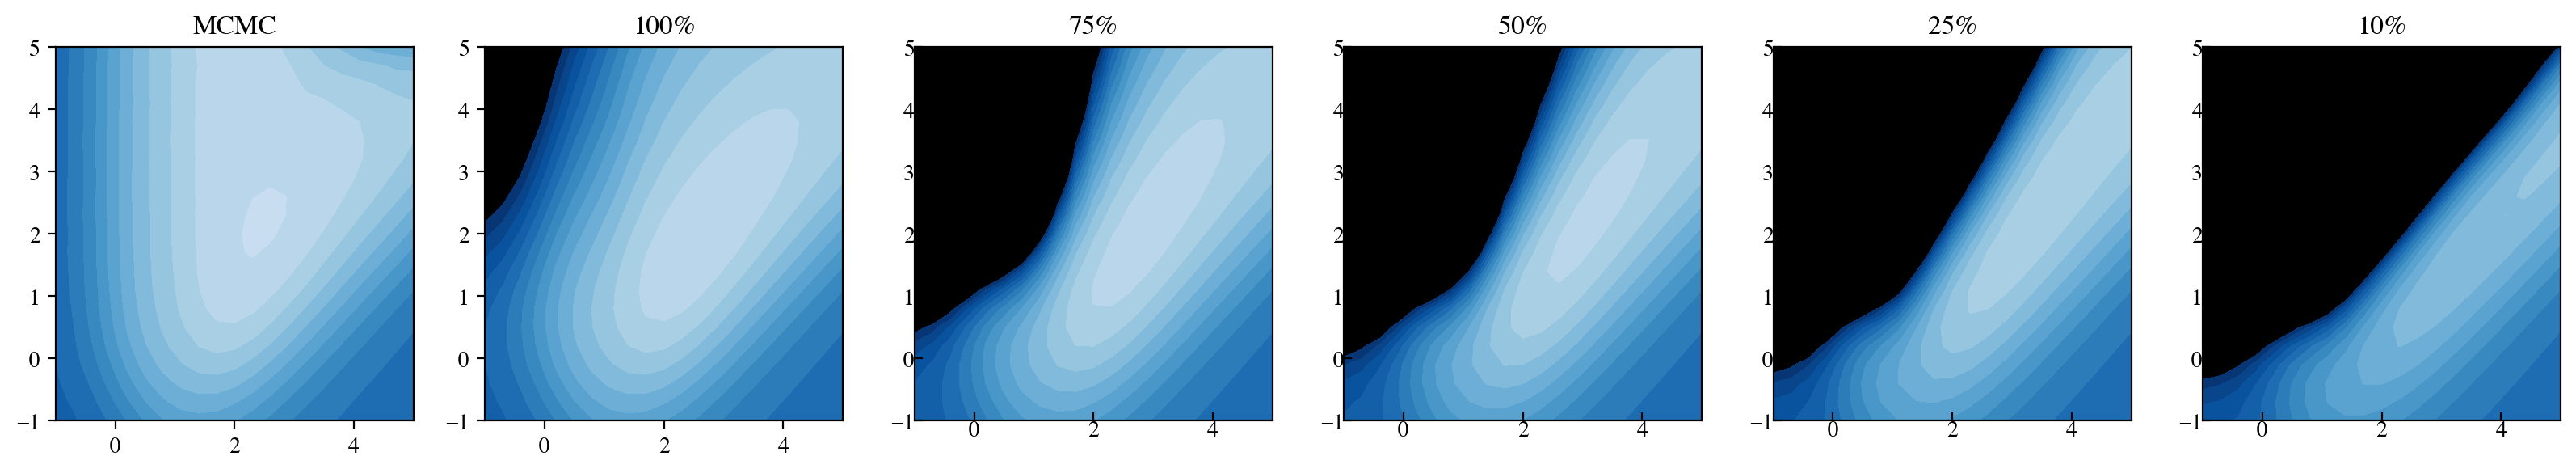

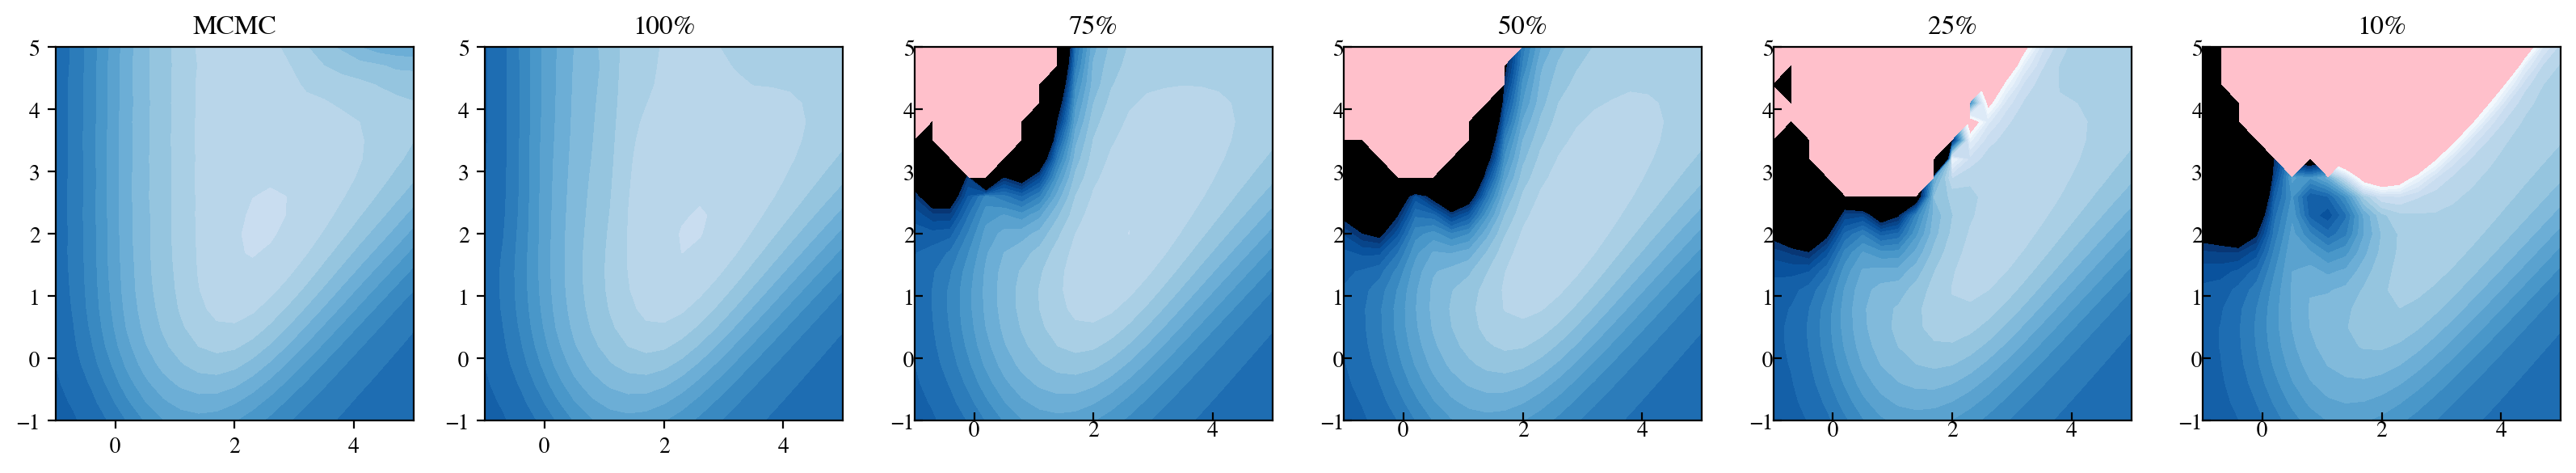

In [5]:
dataset = "ionosphere"

with open(f"../experiments/contour-plots/experiment_results/{dataset}_mcmc_fold_3.pkl", "rb") as f:
    mcmc_lml = pickle.load(f)['mean_lml']

contour_min = np.min(mcmc_lml) - 0.15
contour_max = np.max(mcmc_lml) + 0.2

plot_result('ionosphere', contour_min, contour_max)